In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy import optimize
import re


In [2]:
days = [
1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,
11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,
19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,
27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,
35,35,36,36,37,37,38,38,39,39,40,40,41,41
]
times = [
"08:07","15:37","08:55","16:25","09:45","17:14","10:35","18:00",
"11:28","18:46","12:22","19:31","13:24","20:16","03:22","21:01",
"04:07","21:46","04:50","11:58","05:31","12:56","06:08","13:45",
"06:47","14:25","07:22","15:00","07:59","15:34","08:34","16:08",
"09:10","16:41","09:45","17:12","10:21","17:45","10:57","18:15",
"11:38","18:48","12:25","19:20","02:22","19:52","02:58","20:30",
"03:37","10:44","04:23","11:55","05:15","12:57","06:09","13:50",
"07:05","14:39","07:58","15:27","08:50","16:10","09:40","16:52",
"10:30","17:34","11:19","18:12","12:10","18:49","01:32","19:24",
"02:13","20:00","02:54","09:54","03:39","11:15","04:29","12:22",
"05:21","13:14"
]
heights =  [
6.57,-0.39,5.38,-1.74,5.26,-1.36,4.13,-1.15,3.48,-1.61,
2.62,0.05,1.83,1.01,3.57,0.73,4.54,2.17,3.76,2.88,
3.90,1.92,4.73,1.74,5.66,0.79,5.33,-0.04,5.23,-1.12,
6.67,-0.61,4.74,-0.93,4.69,-1.29,4.20,0.22,3.68,0.26,
2.47,0.36,2.59,0.99,4.10,1.87,3.17,1.60,3.71,3.10,
4.04,2.49,4.07,2.18,5.93,0.70,6.89,0.21,6.72,0.22,
6.77,-1.68,5.77,-1.32,4.35,-0.73,4.23,-0.38,2.24,-0.61,
3.45,-0.46,4.13,1.21,3.34,2.58,3.32,3.26,5.21,2.39,
4.83,2.41
]



In [3]:
with open(r"C:\Users\posid\OneDrive\Desktop\ASTRON_19\astr19_matplotlib_defaults.txt", "r") as file:
    content = file.read()

In [4]:
def deciTime(d, t, h):
    l = []
    for i in range(82):
        a, b = re.split(':', t[i])
        c = (float(a) + (float(b) / 60)) + (24*(d[i]-1))
        l.append(c)
    return l

In [5]:
t = deciTime(days,times, heights)


In [6]:

npoints = (82)
sig = 0.25
yerr= .25
y_err = np.full(npoints,sig)


<ErrorbarContainer object of 3 artists>

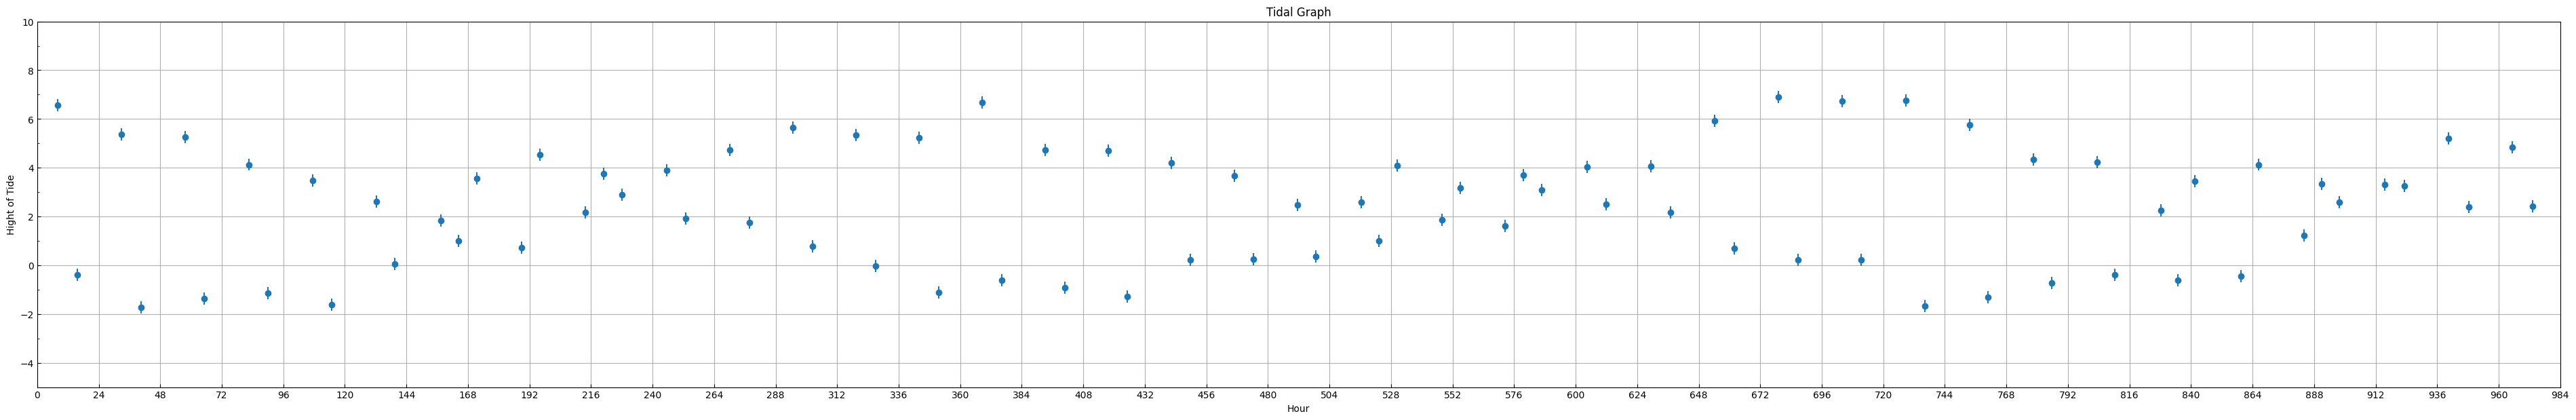

In [7]:
f, ax = plt.subplots(1,1,figsize=(48,7))
ax.xaxis.set_tick_params(which='both',direction='in')
ax.yaxis.set_tick_params(which='both',direction='in')
ax.set_ylim(-5,10)
ax.set_xlim(0,984)
ax.set_xlabel('Hour')
ax.set_ylabel('Hight of Tide')
ax.set_title('Tidal Graph')
ax.set_xticks(np.arange(0,1000, 24),minor=False)
ax.set_yticks(np.arange(-5,10),minor=True)
ax.grid(True)
plt.errorbar(t,heights,yerr=y_err,fmt='o')




In [8]:
t = np.array(t)

In [ ]:
a = 10
b =2.1
c = 0.27
d = -1.3

def f_line(t,a,b,c,d,):
    return a *np.sin(b*t +c) + d  
params, params_cov = optimize.curve_fit(f_line,t,heights,sigma=yerr,p0=[1,1,0,0])


a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]


print(a_fit,b_fit,c_fit,d_fit)


y_fit = a_fit * np.sin(b_fit * t + c_fit) +d_fit 

-0.5292640042562939 1.0013575972791655 4.732709159320187 2.4359060608300855


In [13]:

npoints = 1000
x = np.linspace(0.,1000,npoints)
y_fit_x = a_fit * np.sin(b_fit * x + c_fit) +d_fit 

<ErrorbarContainer object of 3 artists>

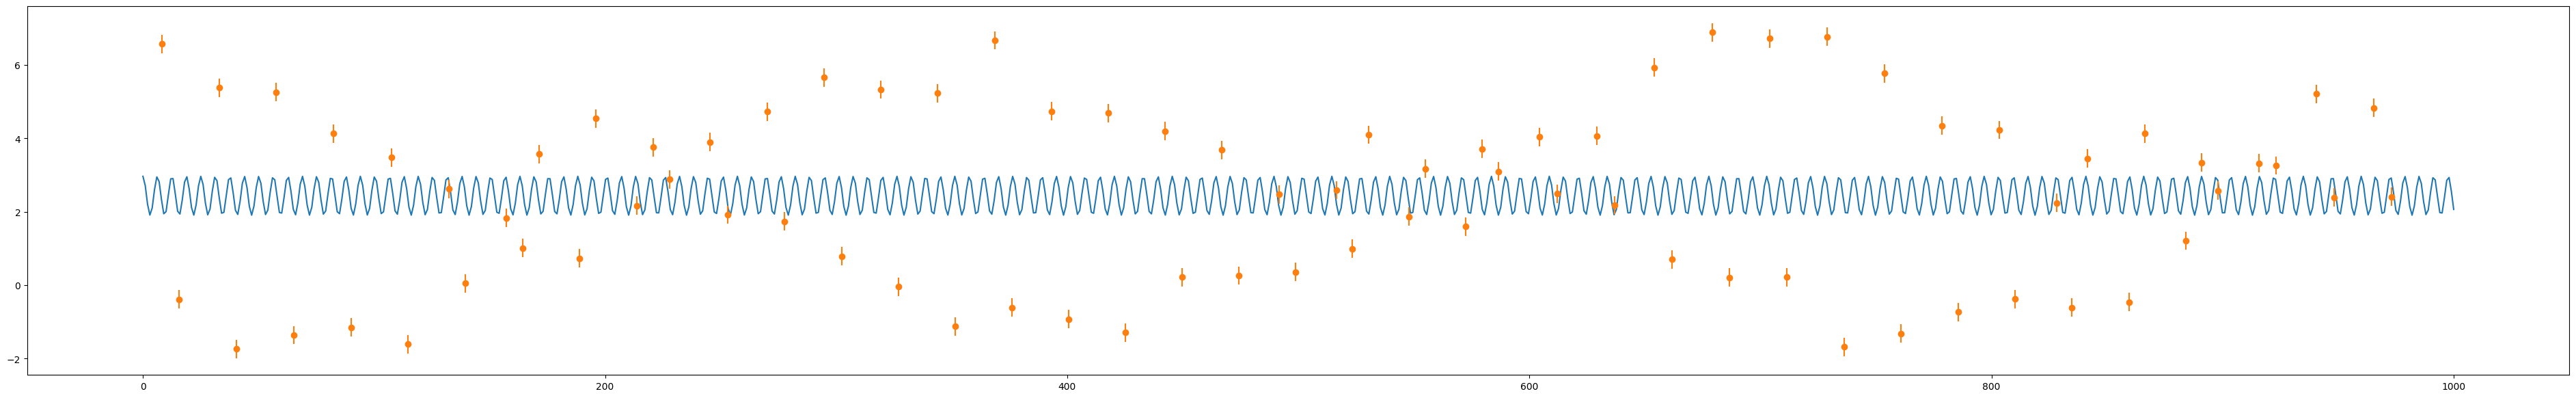

In [11]:

f, ax = plt.subplots(1,1,figsize=(48,7))
plt.plot(x,y_fit_x,label='fit')
plt.errorbar(t,heights,yerr=y_err,fmt='o')